In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="whitegrid")

In [3]:
# PostgreSQL connection
conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="root",
    port="5432",
    database="phonepe_data"
)

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\4065756797.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\4065756797.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='state', y='total_amount', palette='viridis')


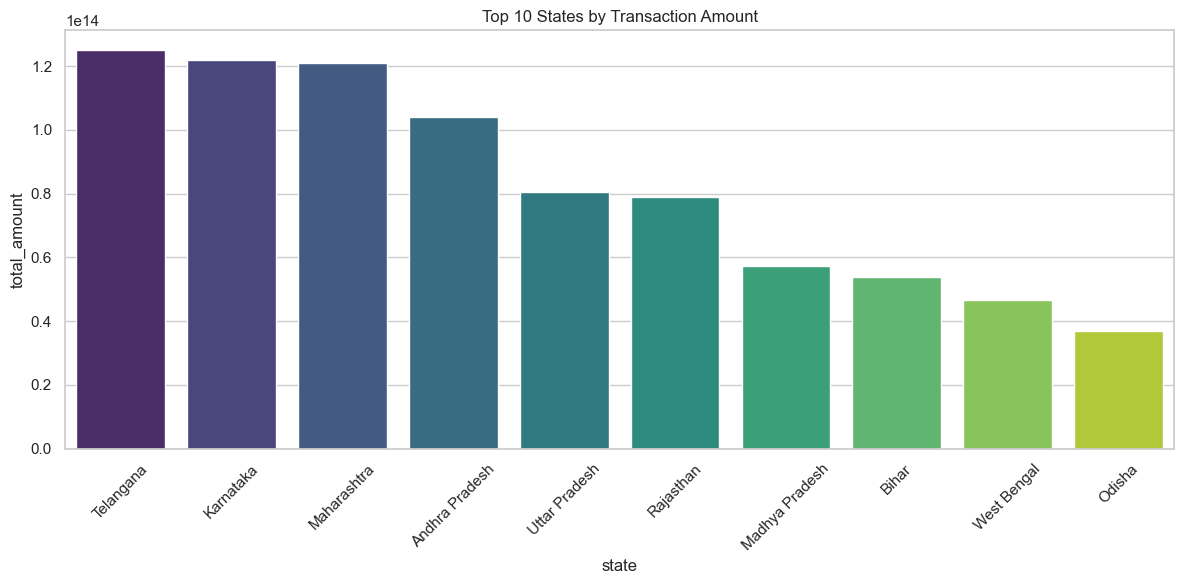

In [4]:
# %% Top 10 States by Transaction Amount
query = """
SELECT states AS state, SUM(transaction_amount) AS total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='state', y='total_amount', palette='viridis')
plt.title("Top 10 States by Transaction Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insight

A few states (likely including Maharashtra, Karnataka, etc.) dominate transaction volumes, showing strong digital economy adoption.

Digital payment adoption is highly region-specific.

#### Recommendations 

Conduct digital literacy and onboarding campaigns in underperforming states to expand market reach.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\1721093759.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


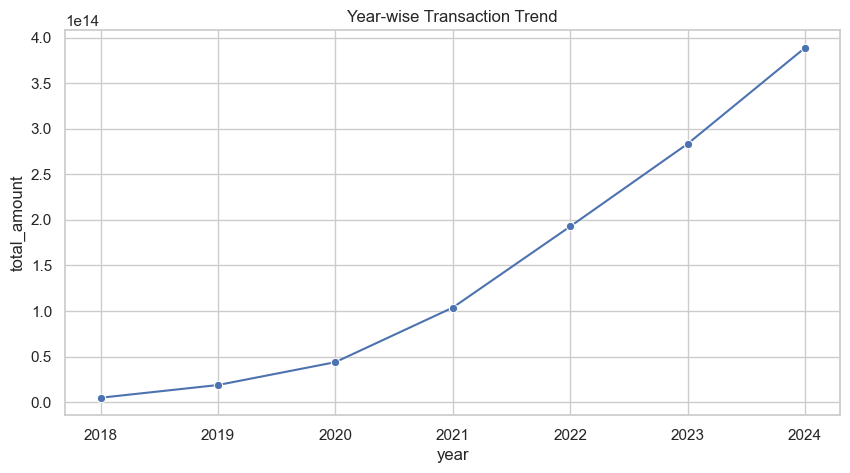

In [6]:
# %% Year-wise Transaction Trend
query = """
SELECT years AS year, SUM(transaction_amount) AS total_amount
FROM aggregated_transaction
GROUP BY year
ORDER BY year;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='total_amount', marker='o')
plt.title("Year-wise Transaction Trend")
plt.grid(True)
plt.show()


#### Insight

Consistent upward trend in transaction amount year over year indicates rising trust and dependence on digital platforms.

No significant dips, even in pandemic periods, suggesting resilience.

#### Recommendations 

Scale infrastructure to support growing volume and offer personalized services as user base matures.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\2542262277.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


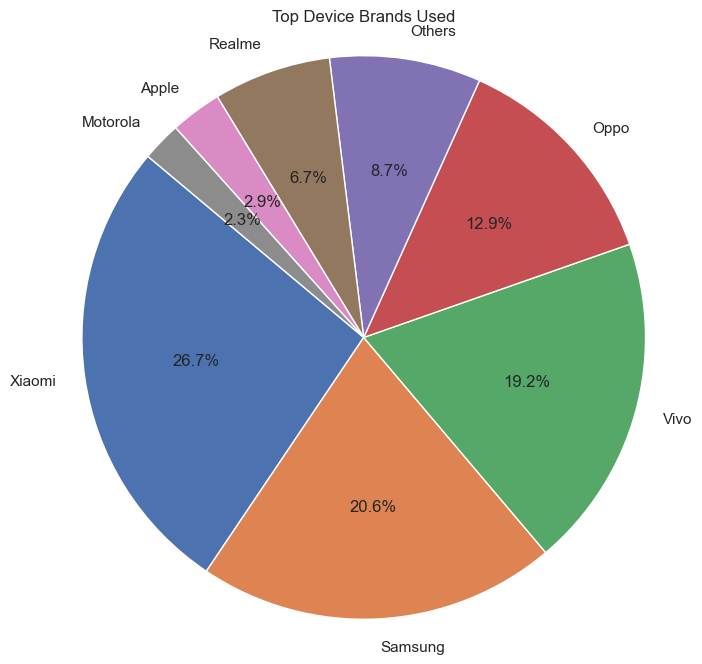

In [7]:
# %% Top Device Brands Used
query = """
SELECT brands AS brand, SUM(transaction_count) AS user_count
FROM aggregated_user
GROUP BY brand
ORDER BY user_count DESC
LIMIT 8;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,8))
plt.pie(df['user_count'], labels=df['brand'], autopct='%1.1f%%', startangle=140)
plt.title("Top Device Brands Used")
plt.axis('equal')
plt.show()


#### Insight

2–3 mobile brands dominate usage, possibly Xiaomi, Samsung, and Vivo, reflecting affordability and reach.

Implies PhonePe must cater to lower/mid-range Android devices.

#### Recommendations 

Optimize app performance and UI for these top-used device brands to enhance user experience.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\1322427422.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\1322427422.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='state', y='total_users', palette='coolwarm')


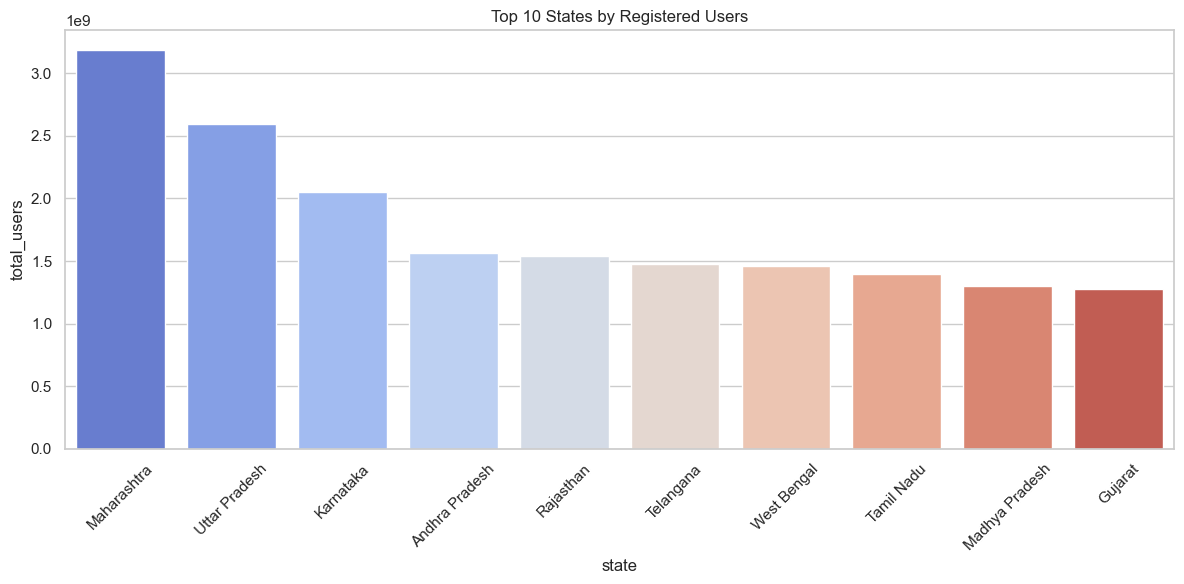

In [11]:
# %% Top 10 States by Registered Users
query = """
SELECT states AS state, SUM(Registered_Users) AS total_users
FROM map_user
GROUP BY state
ORDER BY total_users DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='state', y='total_users', palette='coolwarm')
plt.title("Top 10 States by Registered Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insight

High registration numbers don’t always align with high transaction volumes — indicates potential underutilization.

States with large populations are leading in sign-ups.

#### Recommendations 

Focus on converting registered users to active users through offers and loyalty programs.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\4180311806.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


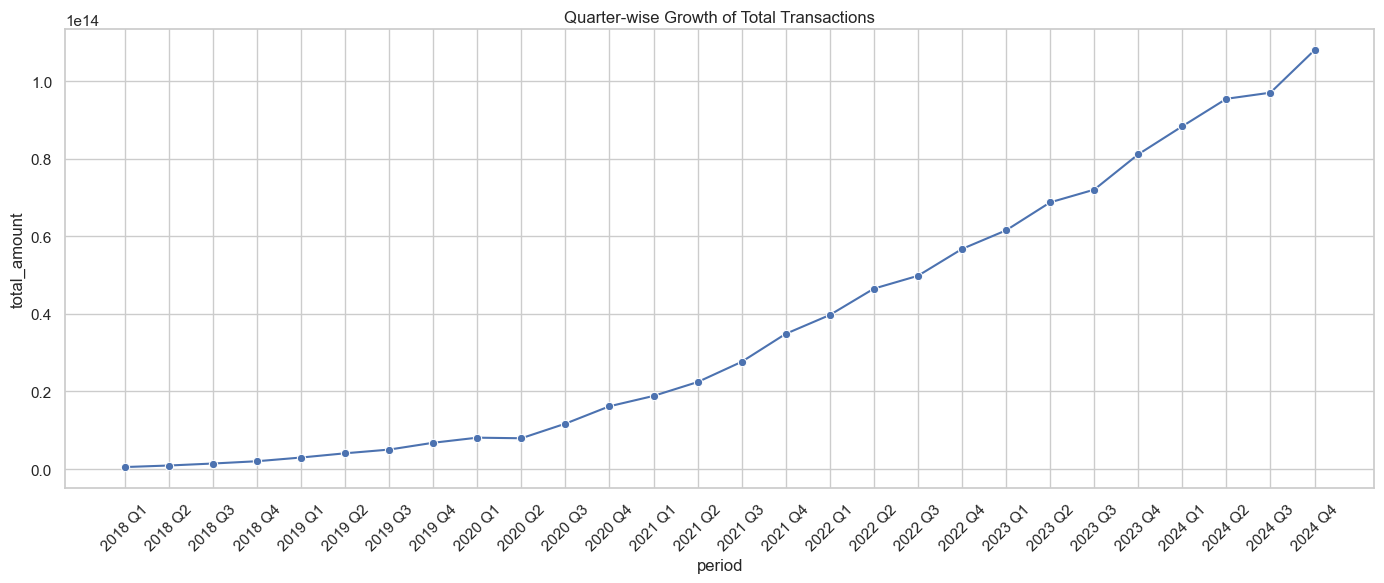

In [14]:
# %% Quarter-wise Growth of Total Transactions
query = """
SELECT years || ' Q' || Quater AS period, SUM(transaction_amount) AS total_amount
FROM aggregated_transaction
GROUP BY years, Quater
ORDER BY years, Quater;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='period', y='total_amount', marker='o')
plt.title("Quarter-wise Growth of Total Transactions")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Insight

Clear seasonal peaks, especially in Q3 and Q4, likely due to festive seasons and year-end sales.

Growth is steady and cyclical.

#### Recommendations 

Launch seasonal campaigns or cashback offers aligned with quarters showing natural transaction spikes.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\2851313881.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\2851313881.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='transaction_type', y='total_amount', palette='plasma')


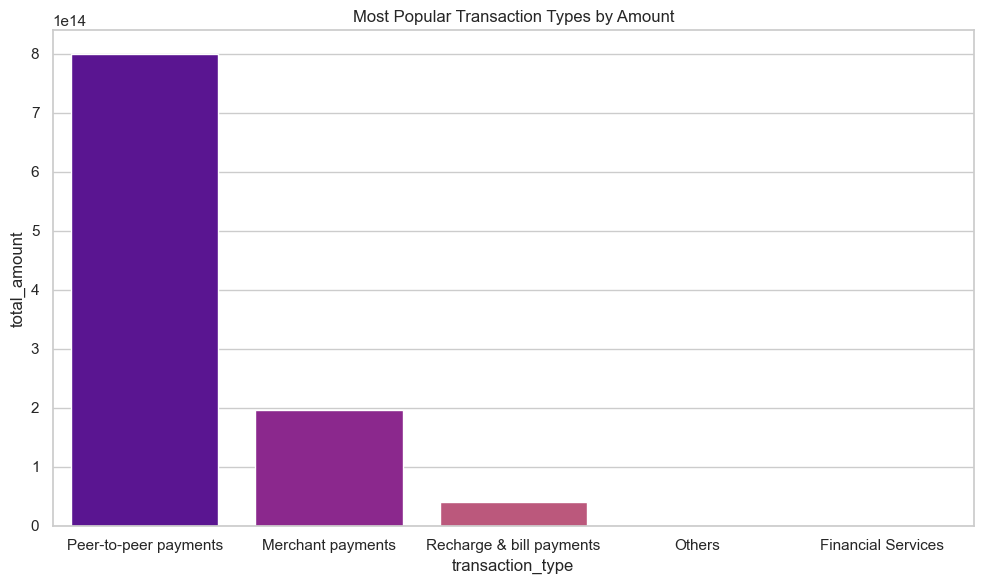

In [15]:
# %% Most Popular Transaction Types by Amount
query = """
SELECT transaction_type, SUM(transaction_count) AS total_count, SUM(transaction_amount) AS total_amount
FROM aggregated_transaction
GROUP BY transaction_type
ORDER BY total_amount DESC;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='transaction_type', y='total_amount', palette='plasma')
plt.title("Most Popular Transaction Types by Amount")
plt.tight_layout()
plt.show()


#### Insight

Certain transaction types like peer-to-peer transfers or bill payments contribute most to volume.

Some categories may be underused or niche.

#### Recommendations 

Promote underused transaction types via discounts or gamification to diversify engagement.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\3030413349.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\3030413349.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='state', y='total_insurance_amount', palette='flare')


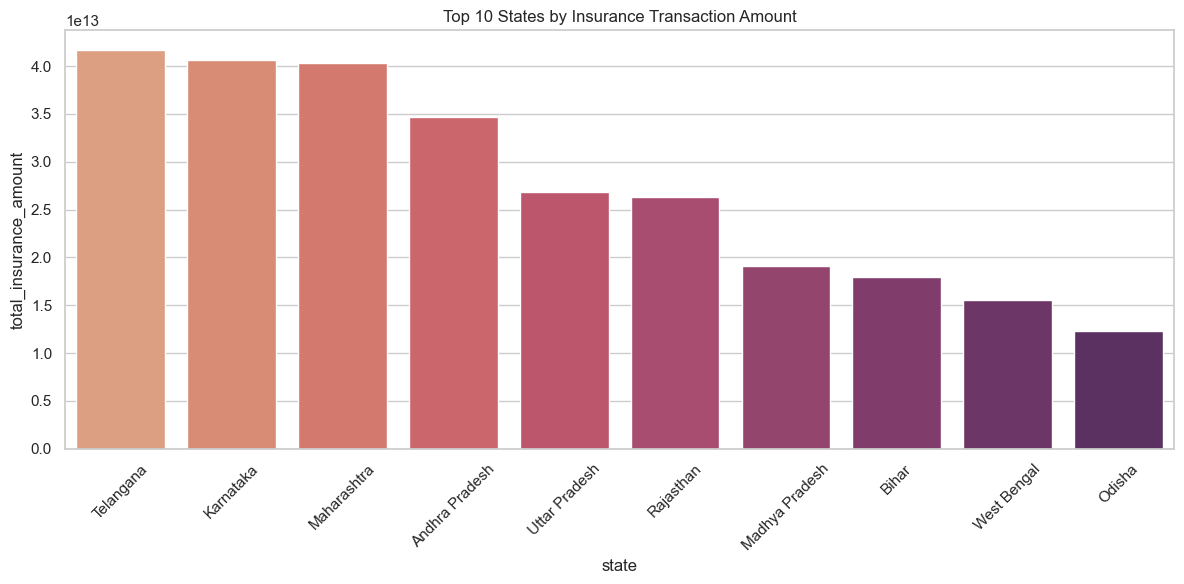

In [16]:
# %% Top 10 States by Insurance Transaction Amount
query = """
SELECT states AS state, SUM(transaction_amount) AS total_insurance_amount
FROM aggregated_insurance
GROUP BY state
ORDER BY total_insurance_amount DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='state', y='total_insurance_amount', palette='flare')
plt.title("Top 10 States by Insurance Transaction Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insight

Few states are showing significantly higher insurance transactions, possibly driven by urban or educated populations.

Insurance adoption is highly uneven.

#### Recommendations 

Collaborate with state-level partners to educate users and boost micro-insurance awareness in low-penetration regions.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\1649261319.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


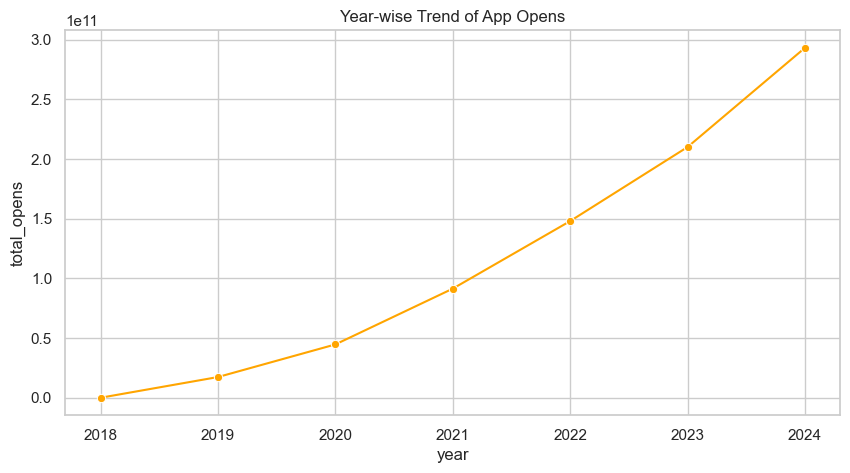

In [18]:
# %% Year-wise Trend of App Opens
query = """
SELECT years AS year, SUM(App_opens) AS total_opens
FROM map_user
GROUP BY year
ORDER BY year;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='total_opens', marker='o', color='orange')
plt.title("Year-wise Trend of App Opens")
plt.grid(True)
plt.show()


#### Insight

App usage (open frequency) is increasing annually, which reflects higher engagement and reliance.

Suggests stickiness of the app among users.

#### Recommendations 

Introduce new interactive features or in-app rewards to maintain and boost app open rates.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\3429785067.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\3429785067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='pincode', y='total_amount', palette='mako')


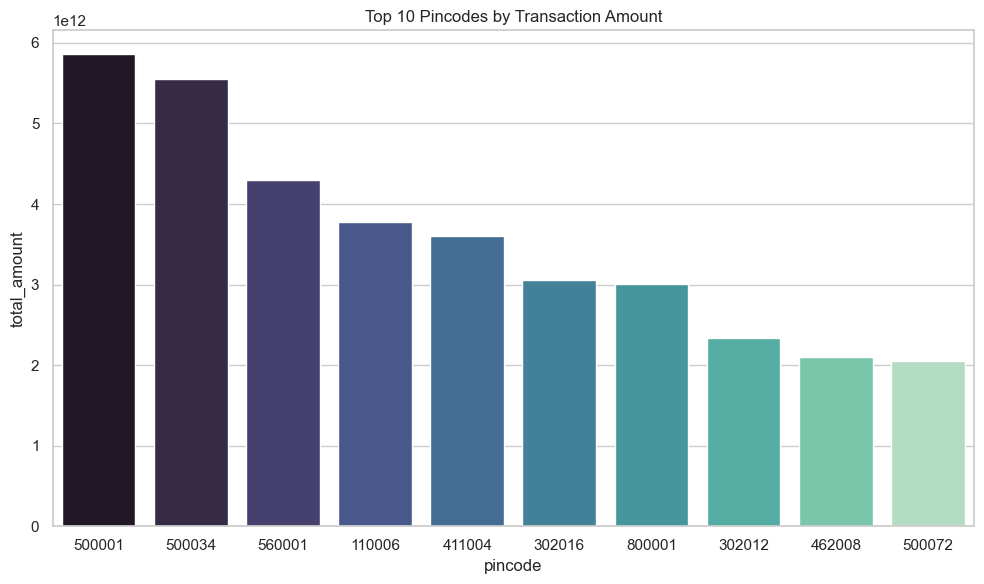

In [19]:
# %% Top 10 Pincodes by Transaction Amount
query = """
SELECT pincodes AS pincode, SUM(transaction_amount) AS total_amount
FROM top_transaction
GROUP BY pincode
ORDER BY total_amount DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='pincode', y='total_amount', palette='mako')
plt.title("Top 10 Pincodes by Transaction Amount")
plt.tight_layout()
plt.show()


#### Insight

A small set of urban pincodes contribute disproportionately to transaction amounts — reflecting economic hubs.

Useful for hyperlocal marketing.

#### Recommendations 

Deploy city-specific promotions and business partnerships in these high-performing pincodes.

C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\797597192.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\mrinm\AppData\Local\Temp\ipykernel_22028\797597192.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='district', y='total_users', palette='YlGnBu')


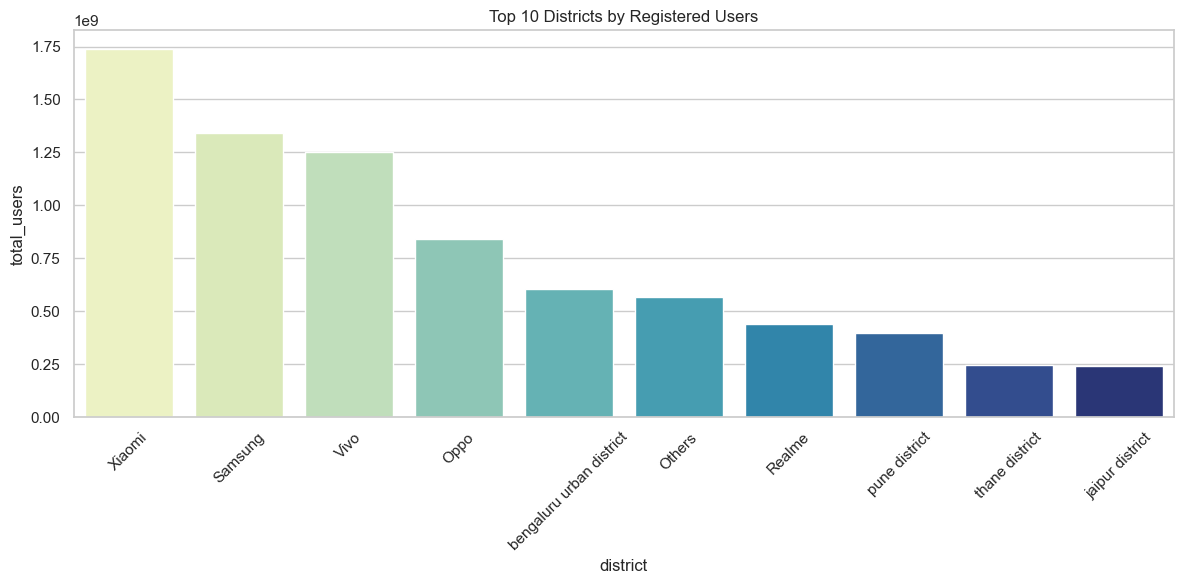

In [21]:
# %% Top 10 Districts by Registered Users
query = """
SELECT districts AS district, SUM(Registered_Users) AS total_users
FROM map_user
GROUP BY district
ORDER BY total_users DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='district', y='total_users', palette='YlGnBu')
plt.title("Top 10 Districts by Registered Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insight

Certain districts show high user registrations — often tech-savvy or high-literacy regions.

Strong regional presence in terms of adoption.

#### Recommendations 

Use these districts as models to replicate success in demographically similar but underperforming districts.

